## Generic 1S Slater-Type Orbital (STO)

A 1S STO centred at $\mathbf{R}$ is defined as:

$$\psi_{1S}(\mathbf{r};\, \zeta,\, \mathbf{R}) = N\, e^{-\zeta\, |\mathbf{r} - \mathbf{R}|}$$

where:

| Symbol | Meaning |
|--------|---------|
| $\mathbf{r}$ | electron position |
| $\mathbf{R}$ | centre (nucleus position) |
| $\zeta > 0$ | exponent (controls orbital width; $\zeta = Z/n^*$ for nuclear charge $Z$) |
| $N$ | normalisation constant |

**Normalisation** (3D, integrating over all space):

$$\int |\psi_{1S}|^2\, d^3r = 1 \implies N = \sqrt{\frac{\zeta^3}{\pi}}$$

so the fully normalised form is:

$$\psi_{1S}(\mathbf{r};\, \zeta,\, \mathbf{R}) = \sqrt{\frac{\zeta^3}{\pi}}\, e^{-\zeta\, |\mathbf{r} - \mathbf{R}|}$$

For **hydrogen** ($Z = 1$, $n^* = 1$) in atomic units, $\zeta = 1$ and the orbital reduces to the exact 1s hydrogenic wavefunction.

## 1D Simplification

Restricting to a single spatial dimension $x$, the orbital becomes:

$$\psi_{1S}(x;\, \zeta,\, c) = \sqrt{\zeta}\, e^{-\zeta\, |x - c|}$$

where the 1D normalisation follows from:

$$\int_{-\infty}^{\infty} e^{-2\zeta|x|}\, dx = \frac{1}{\zeta} \implies N_{1D} = \sqrt{\zeta}$$

For hydrogen ($\zeta = 1$) centred at the origin this simplifies to:

$$\psi_{1S}(x) = e^{-|x|}$$

## Overlap Integral — H₂ Bond Length

For two 1D hydrogen STOs ($\zeta = 1$) centred at $c_1$ and $c_2$, the overlap is:

$$S = \int_{-\infty}^{\infty} e^{-|x - c_1|}\, e^{-|x - c_2|}\, dx$$

Substituting $u = x - c_1$ and $d = c_2 - c_1 \geq 0$:

$$S = \int_{-\infty}^{\infty} e^{-|u|}\, e^{-|u - d|}\, du = (1 + d)\,e^{-d}$$

With centres $c_1 = 8$, $c_2 = 9.4$, the separation is $d = 1.4$ a.u. (equilibrium H–H bond length):

$$S = (1 + 1.4)\,e^{-1.4} = 2.4\,e^{-1.4}$$

In [2]:
import numpy as np
from scipy.integrate import quad

zeta = 1.0
c1, c2 = 8.0, 9.4
d = c2 - c1   # 1.4 a.u.

# Analytical closed form
S_analytical = (1 + zeta * d) * np.exp(-zeta * d)

# Numerical verification
integrand = lambda x: np.exp(-zeta * abs(x - c1)) * np.exp(-zeta * abs(x - c2))
S_numerical, err = quad(integrand, -np.inf, np.inf)

print(f"Separation       d = {d} a.u.")
print(f"Analytical   S(d) = (1 + {d}) · e^(-{d}) = {S_analytical:.8f}")
print(f"Numerical    S(d) = {S_numerical:.8f}  (error est. {err:.2e})")


Separation       d = 1.4000000000000004 a.u.
Analytical   S(d) = (1 + 1.4000000000000004) · e^(-1.4000000000000004) = 0.59183271
Numerical    S(d) = 0.59183271  (error est. 1.05e-08)


  d (a.u.)          S(d)
--------------------------
       0.0    1.00000000
       0.1    0.99532116
       0.2    0.98247690
       0.3    0.96306369
       0.4    0.93844806
       0.5    0.90979599
       0.6    0.87809862
       0.7    0.84419502
       0.8    0.80879214
       0.9    0.77248235
       1.0    0.73575888
       1.1    0.69902928
       1.2    0.66262727
       1.3    0.62682312
       1.4    0.59183271
       1.5    0.55782540
       1.6    0.52493095
       1.7    0.49324551
       1.8    0.46283689
       1.9    0.43374900
       2.0    0.40600585
       2.1    0.37961493
       2.2    0.35457011
       2.3    0.33085418
       2.4    0.30844104
       2.5    0.28729750
       2.6    0.26738488
       2.7    0.24866040
       2.8    0.23107824
       2.9    0.21459056
       3.0    0.19914827


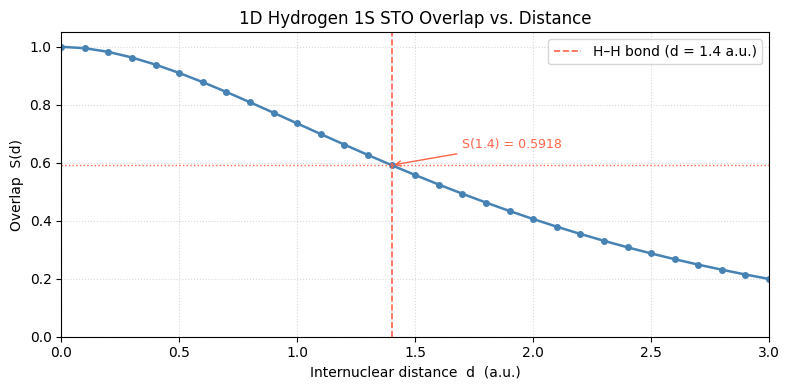

In [3]:
import matplotlib.pyplot as plt

distances = np.arange(0.0, 3.1, 0.1)
overlaps  = (1 + distances) * np.exp(-distances)

# ── Table ─────────────────────────────────────────────────────────────────────
print(f"{'d (a.u.)':>10}  {'S(d)':>12}")
print("-" * 26)
for d_val, s_val in zip(distances, overlaps):
    print(f"{d_val:>10.1f}  {s_val:>12.8f}")

# ── Plot ──────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(distances, overlaps, marker='o', markersize=4, linewidth=1.8, color='steelblue')
ax.axvline(1.4, color='tomato', linestyle='--', linewidth=1.2, label='H–H bond (d = 1.4 a.u.)')
ax.axhline(overlaps[14], color='tomato', linestyle=':', linewidth=1.0)
ax.annotate(f'S(1.4) = {overlaps[14]:.4f}',
            xy=(1.4, overlaps[14]), xytext=(1.7, overlaps[14] + 0.06),
            arrowprops=dict(arrowstyle='->', color='tomato'), color='tomato', fontsize=9)
ax.set_xlabel('Internuclear distance  d  (a.u.)')
ax.set_ylabel('Overlap  S(d)')
ax.set_title('1D Hydrogen 1S STO Overlap vs. Distance')
ax.set_xlim(0, 3)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np